In [1]:
%matplotlib inline

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pprint import pprint

# map city types to official Pyber colors
color_dict = {"Urban": "coral", "Suburban": "skyblue", "Rural": "gold"}

In [3]:
# function to build summary dataframe by city type
def build_merged_df(type_df):
    type_fare_df = type_df[["city", "fare"]]
    type_ride_df = type_df[["city", "ride_id"]]
    type_driver_df = type_df[["city", "driver_count"]]

    # Average fare by city type
    type_group_fare = type_fare_df.groupby(["city"])
    type_fare_avg_df = pd.DataFrame(type_group_fare.mean()["fare"])
    type_fare_avg_df = type_fare_avg_df.rename(columns={"fare": "Average Fare"})

    # Total rides by city type
    type_group_ride = type_ride_df.groupby(["city"])
    type_ride_total_df = pd.DataFrame(type_group_ride.count()["ride_id"])
    type_ride_total_df = type_ride_total_df.rename(columns={"ride_id": "Total Rides"})

    # Driver count by city type
    # No need to groupby and count, count already provided in data
    # Just drop duplicates so we have one row per city
    type_driver_count_df = type_driver_df.drop_duplicates()
    type_driver_count_df = type_driver_count_df.rename(columns={"driver_count": "Driver Count"})
    
    # Multiply driver count by 10 to make bubbles bigger and relative size differences more apparent
    type_driver_count_df["Driver Count"] = type_driver_count_df["Driver Count"] * 10

    # Merge the type dataframes
    type_merge_df = pd.merge(type_fare_avg_df, type_ride_total_df, on="city")
    type_merge_df = pd.merge(type_merge_df, type_driver_count_df, on="city")
    
    return type_merge_df

In [4]:
# File to Load (Remember to change these)
city_csv = os.path.join("data", "city_data.csv")
ride_csv = os.path.join("data", "ride_data.csv")

# Read the City and Ride Data
city_df = pd.read_csv(city_csv)
ride_df = pd.read_csv(ride_csv)

# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, on="city", how="left")
pyber_df.head()

# Display the data table for preview

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [5]:
# Obtain the x and y coordinates for each of the three city types
urban_df = pyber_df[pyber_df["type"] == "Urban"]
urban_merge_df = build_merged_df(urban_df)

suburban_df = pyber_df[pyber_df["type"] == "Suburban"]
suburban_merge_df = build_merged_df(suburban_df)

rural_df = pyber_df[pyber_df["type"] == "Rural"]
rural_merge_df = build_merged_df(rural_df)

pprint(urban_merge_df.head())
#pprint(suburban_merge_df.head())
#pprint(rural_merge_df.head())

              city  Average Fare  Total Rides  Driver Count
0      Amandaburgh     24.641667           18           120
1      Barajasview     25.332273           22           260
2      Carriemouth     28.314444           27           520
3  Christopherfurt     24.501852           27           410
4        Deanville     25.842632           19           490


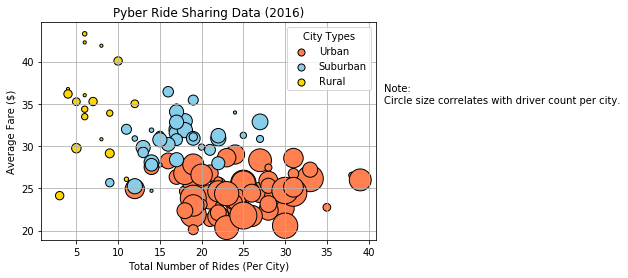

In [17]:
# Build the scatter plots for each city types
urban_plot = plt.scatter(
    urban_merge_df["Total Rides"], urban_merge_df["Average Fare"],
    marker = "o", facecolor=color_dict.get("Urban"), edgecolor="black",
    s=urban_merge_df["Driver Count"], label="Urban")

suburban_plot = plt.scatter(
    suburban_merge_df["Total Rides"], suburban_merge_df["Average Fare"],
    marker = "o", facecolor=color_dict.get("Suburban"), edgecolor="black",
    s=suburban_merge_df["Driver Count"], label="Suburban")

rural_plot = plt.scatter(
    rural_merge_df["Total Rides"], rural_merge_df["Average Fare"],
    marker = "o", facecolor=color_dict.get("Rural"), edgecolor="black",
    s=rural_merge_df["Driver Count"], label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
plot_legend = plt.legend(handles=[urban_plot, suburban_plot, rural_plot], title="City Types")

# The bubbles were scaled, with "Urban" being bigger than others.
# Much googling to find this way to hardcode size of legend
for plot_legend_handle in plot_legend.legendHandles:
    plot_legend_handle.set_sizes([50])

# Incorporate a text label regarding circle size
plt.figtext(0.92, 0.60, "Note:\n" + "Circle size correlates with driver count per city.")

# Save Figure
# by default, text label was cut off right side of saved image
# I tried plt.tight_layout() but it moved my text label over plot
# after some googling, the bbox parameter below got image to save correctly 
save_bubble = os.path.join("images", "Pyber_Bubble_Chart")
plt.savefig(save_bubble, bbox_inches="tight")
#vars(plot_legend)

In [7]:
# Show plot
plt.show()

## Total Fares by City Type

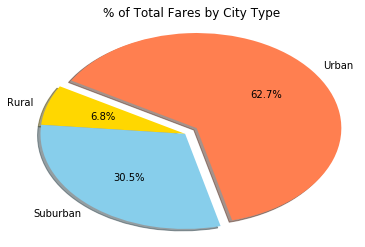

In [40]:
# Calculate Type Percents
type_fares_df = pyber_df[["type", "fare"]] 
type_fares_df

type_fares_group = type_fares_df.groupby(["type"])
type_fares_total_df = pd.DataFrame(type_fares_group.sum()["fare"])
type_fares_total_df = type_fares_total_df.rename(columns={"fare": "Total Fares"})
type_fares_total_df = type_fares_total_df.reset_index()

plot_types = type_fares_total_df["type"].tolist()
plot_values = type_fares_total_df["Total Fares"].tolist()

plot_colors = []
for city_type in plot_types:
    plot_colors.append(color_dict.get(city_type))

explode = (0,0,0.1)
type_fares_total_df

# Build Pie Chart
fares_plot = plt.pie(plot_values, explode=explode, labels=plot_types, colors=plot_colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
plt.axis("tight")

# Save Figure

save_fare = os.path.join("images", "Fare_Pie_Chart")
plt.savefig(save_fare)


In [9]:
# Show Figure
plt.show()

## Total Rides by City Type

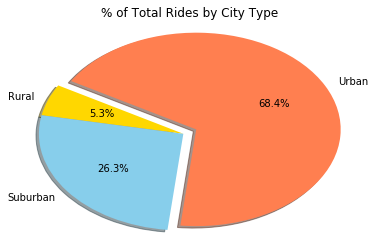

In [52]:
# Calculate Type Percents
type_rides_df = pyber_df[["type", "ride_id"]] 
type_rides_df

type_rides_group = type_rides_df.groupby(["type"])
type_rides_total_df = pd.DataFrame(type_rides_group.count()["ride_id"])
type_rides_total_df = type_rides_total_df.rename(columns={"ride_id": "Total Rides"})
type_rides_total_df = type_rides_total_df.reset_index()

plot_types = type_rides_total_df["type"].tolist()
plot_values = type_rides_total_df["Total Rides"].tolist()

plot_colors = []
for city_type in plot_types:
    plot_colors.append(color_dict.get(city_type))

explode = (0,0,0.1)
type_rides_total_df

# Build Pie Chart
plt.pie(plot_values, explode=explode, labels=plot_types, colors=plot_colors,
       autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
plt.axis("tight")

# Save Figure

save_rides = os.path.join("images", "Rides_Pie_Chart")
plt.savefig(save_rides)


In [11]:
# Show Figure
plt.show()

## Total Drivers by City Type

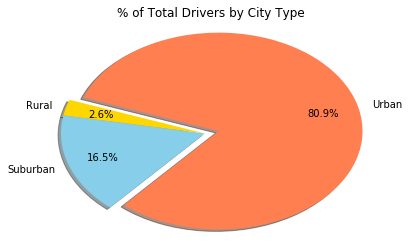

In [55]:
# Calculate Type Percents
type_drivers_df = pyber_df[["type", "city", "driver_count"]] 
type_drivers_df = type_drivers_df.drop_duplicates()
type_drivers_df

type_drivers_group = type_drivers_df.groupby(["type"])
type_drivers_total_df = pd.DataFrame(type_drivers_group.sum()["driver_count"])
type_drivers_total_df = type_drivers_total_df.rename(columns={"driver_count": "Driver Count"})
type_drivers_total_df = type_drivers_total_df.reset_index()

plot_types = type_drivers_total_df["type"].tolist()
plot_values = type_drivers_total_df["Driver Count"].tolist()

plot_colors = []
for city_type in plot_types:
    plot_colors.append(color_dict.get(city_type))

explode = (0,0,0.1)
type_drivers_total_df

# Build Pie Chart
# Rural wedge is very thin, use pctdistance to move percentage value closer to
# edge of wedge, so it does not push outside gold area
plt.pie(plot_values, explode=explode, labels=plot_types, colors=plot_colors,
       autopct="%1.1f%%", shadow=True, startangle=160, pctdistance=0.75)
plt.title("% of Total Drivers by City Type")
plt.axis("tight")
# Save Figure

save_fare = os.path.join("images", "Drivers_Pie_Chart")
plt.savefig(save_fare)


In [13]:
# Show Figure
plt.show()